In [16]:
import pandas as pd
import pandas.io.data as web
import numpy as np

In [2]:
# On récupère les cours de différents constructeurs de bagnoles,  un échantillon par jour
Voitures={}
Liste={'Amazon':'AMZN', 'BNP':'BNP.PA',  'Renault':'RNO.PA','Peugeot':'PUGOY','BMW':'BMW.F','Toyota':'TYT.L'}
for constructeur,symbol in Liste.items():
   Voitures[constructeur]=web.get_data_yahoo(symbol,  '1/1/1990', '20/5/2014')

In [93]:
help(web.get_data_yahoo)

Help on function get_data_yahoo in module pandas.io.data:

get_data_yahoo(symbols=None, start=None, end=None, retry_count=3, pause=0.001, adjust_price=False, ret_index=False, chunksize=25)
    Returns DataFrame/Panel of historical stock prices from symbols, over date
    range, start to end. To avoid being penalized by Yahoo! Finance servers,
    pauses between downloading 'chunks' of symbols can be specified.
    
    Parameters
    ----------
    symbols : string, array-like object (list, tuple, Series), or DataFrame
        Single stock symbol (ticker), array-like object of symbols or
        DataFrame with index containing stock symbols.
    start : string, (defaults to '1/1/2010')
        Starting date, timestamp. Parses many different kind of date
        representations (e.g., 'JAN-01-2010', '1/1/10', 'Jan, 1, 1980')
    end : string, (defaults to today)
        Ending date, timestamp. Same format as starting date.
    retry_count : int, default 3
        Number of times to retr

In [23]:
const='BMW'


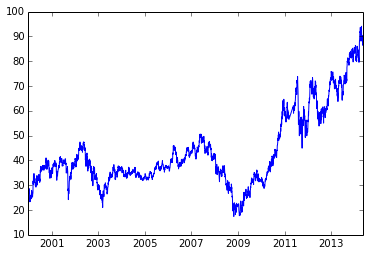

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
S=Voitures[const]['Close']
t=S.index
plt.plot(t,S)

In [18]:
import numpy as np
from correlation import xcorr

In [121]:
SS=S[::1]

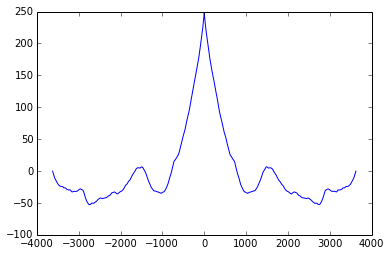

In [122]:
r,l=xcorr(SS-np.mean(SS))
plt.plot(l,r)

In [14]:
import scipy.linalg as la

In [124]:
M=np.argmax(r)

In [86]:
from scipy.signal import lfilter

In [125]:
p=10
R=la.toeplitz(r[M:M+p])
iR=np.linalg.inv(R)
rv=r[M+1:M+p+1]
aa=iR.dot(rv)
print(aa)

[  1.01802674e+00  -4.46223285e-02   1.93166835e-02   2.58758089e-02
  -3.90072512e-02  -2.41362622e-04   1.48029264e-02   6.07478903e-03
  -7.04711259e-03   4.18158788e-03]


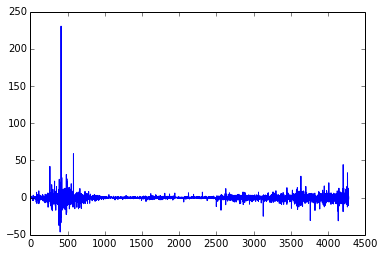

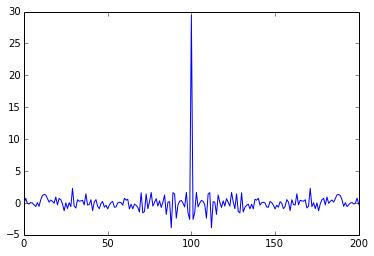

In [19]:
Z=np.array(S)
dZ=Z[:-2]-Z[1:-1]
dZc,l=xcorr(dZ,maxlags=100)
plt.plot(dZ)
plt.figure()
plt.plot(dZc)
M=np.argmax(dZc)

[ -8.98607907e-02  -5.61423441e-02   2.16265824e-02  -1.66054825e-02
  -6.90793760e-05   1.95063386e-04   2.14910092e-02  -2.56566833e-02
  -8.25391188e-02   3.18602370e-02   4.51033189e-02  -1.08907580e-01
  -1.74991704e-02  -2.99049796e-02  -5.29197592e-02   2.66820010e-02
  -1.81642930e-02  -2.91591046e-02   5.24444084e-03  -2.40256645e-02
  -4.59868643e-04   9.76631316e-03  -1.57856792e-02   2.73235242e-02
   2.76148171e-02  -2.54587201e-02   1.71252613e-02  -3.72050125e-02
  -6.11512199e-02   3.96050123e-02  -4.09139532e-02  -4.10149349e-02
  -2.70699586e-02   5.33841044e-04  -4.53149956e-02   1.84796092e-03
  -4.36579856e-02   9.33094783e-03   4.56869851e-02   2.10036111e-02
  -4.17656575e-02   2.10378652e-02  -1.40983908e-02  -1.29044995e-02
  -2.14261326e-02  -4.79355253e-02  -1.33912428e-02   7.86471025e-03
  -3.08092332e-02  -4.47762727e-02  -7.59810728e-03  -2.07732848e-02
   1.84081282e-02  -1.70709134e-03  -3.67076926e-02  -9.22104553e-03
   8.28966144e-03  -3.73679116e-03

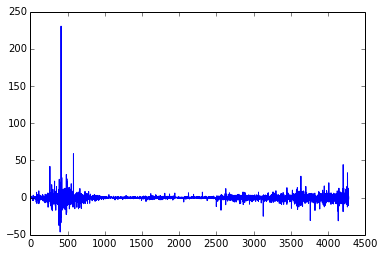

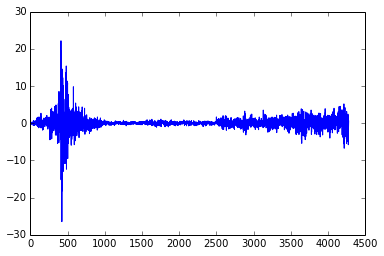

In [90]:
p=100
R=la.toeplitz(dZc[M:M+p])
iR=np.linalg.pinv(R)
rv=dZc[M+1:M+p+1]
aa=iR.dot(rv)
print(aa)

dZpred=lfilter(aa,[1],dZ)
plt.plot(dZ)
plt.figure()
plt.plot(dZpred)

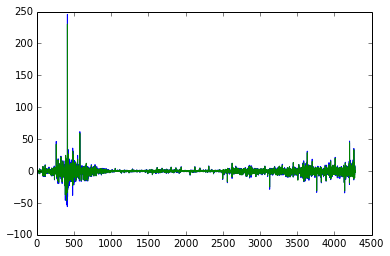

In [92]:
plt.plot(dZ-dZpred)
plt.plot(dZ)

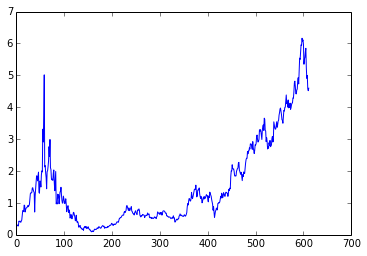

In [30]:

SSpred=lfilter(aa,[1],SS)
#plt.plot(SS)
plt.plot(SS-SSpred)

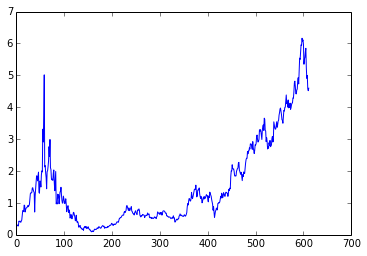

In [22]:
plt.plot(SS-SSpred)

In [23]:
res=SS-SSpred
res[300::].mean()

2.2424264870860062

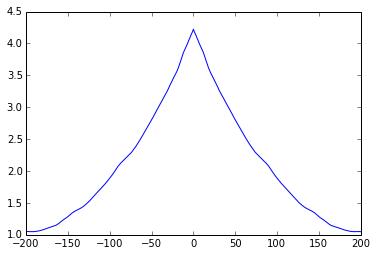

In [24]:
r2,l2=xcorr(SS-SSpred,maxlags=200)
plt.plot(l2,r2)

In [134]:
ZZ=web.get_data_google('AMZN',  '1/1/1990', '20/5/2014')

\\begin{document}([\s\S]*?)\\end{document}

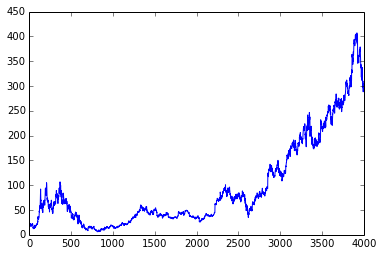

In [136]:
plt.plot(ZZ['Close'])